# 1. Error Function

In [844]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import math

$$ erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt. $$
위와 같이 주어지는 에러함수를 수치적분을 이용하여 구하고 그래프를 그려라. (어떤 방법을 이용하든 관계없음)

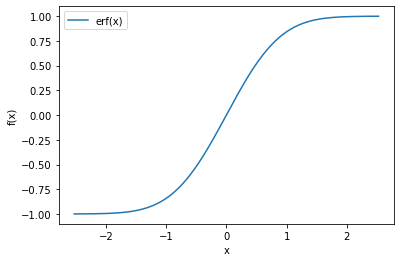

In [845]:
def ef(t):
    return np.exp(-t**2)

def erf(f,x,n):
    s=0
    t=0
    dt = (x)/n
    while(t<x):
        s+=dt*(0.5*f(t)+0.5*f(t+dt))
        t+=dt
        b.append(t)
        fp.append(2/((np.pi)**0.5)*s)
    return 2/(np.pi)**0.5*s

x=2.5
n=100
b=[0]
fp=[0]
afp=[0]*(n*2-1)
ab=[0]*(n*2-1)

erf(ef,x,(n-2))

for i in range(0,n):
    ab[i]=-b[n-1-i]
for i in range(1,n):
    ab[i+n-1]=b[i]
for i in range(0,n):
    afp[i]=-fp[n-1-i]
for i in range(1,n):
    afp[i+n-1]=fp[i]

plt.plot(ab,afp,'-',label="erf(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

$$
\begin{align}
erf(x) &amp;= \frac{2}{\sqrt{\pi}} \sum_{n=0}^{\infty} \frac{ (-1)^n x^{2n+1}} { (2n+1) n!}  \\
&amp;= \frac{2}{\sqrt{\pi}} \left( x - \frac{x^3}{3} + \frac{x^5}{10} - \frac{x^7}{42} + \cdots \right)
\end{align}
$$
에러함수를 테일러 전개하면 위와 같이 주어진다. 위의 전개식과 적분결과를 그래프로 그리고 비교하여라.

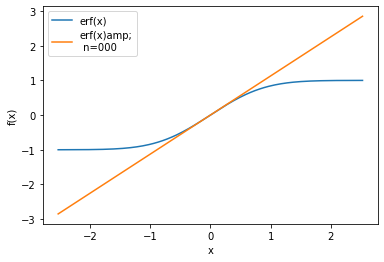

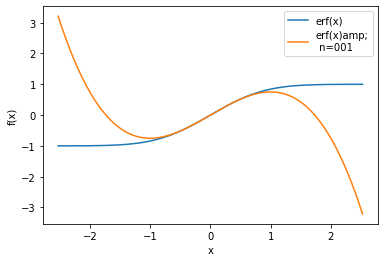

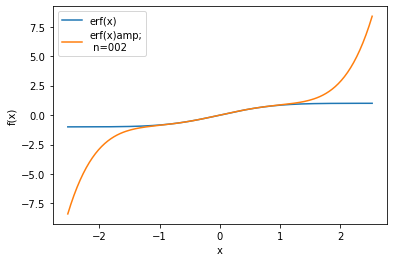

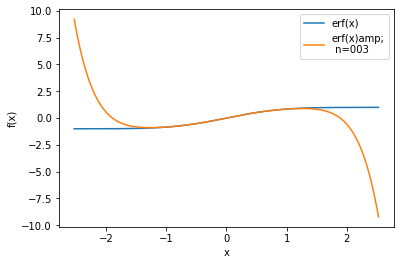

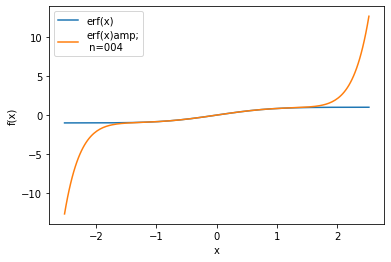

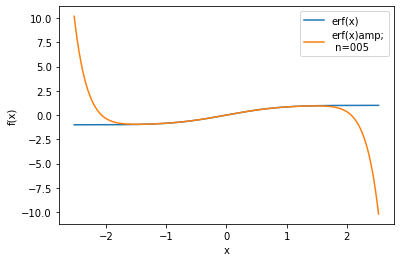

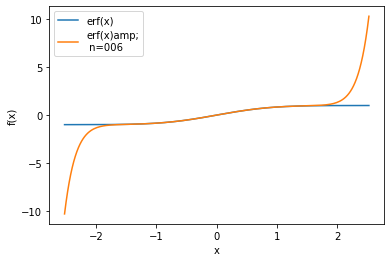

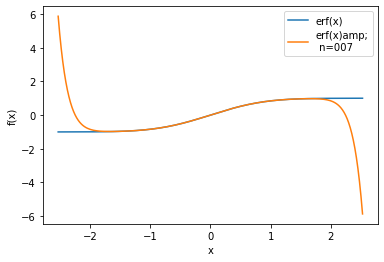

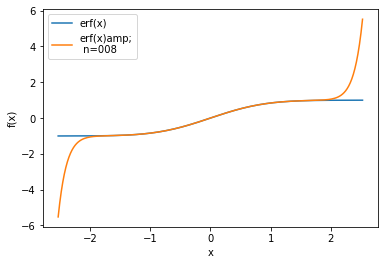

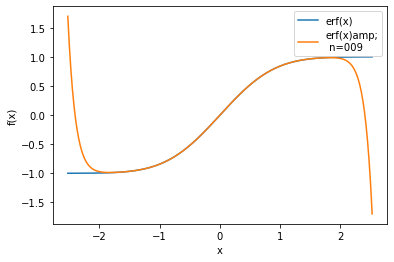

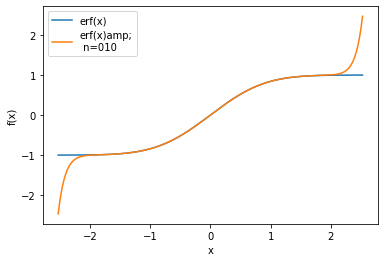

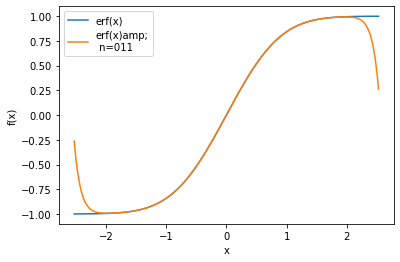

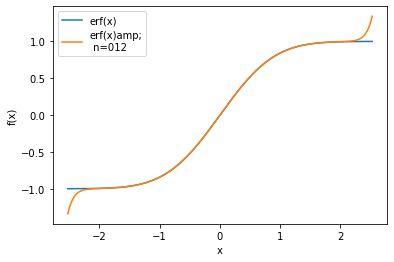

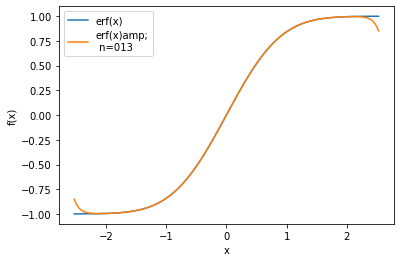

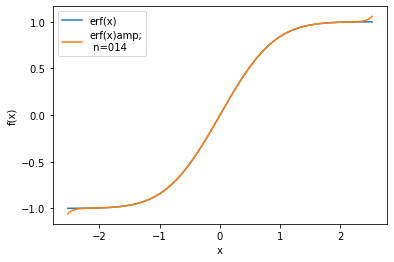

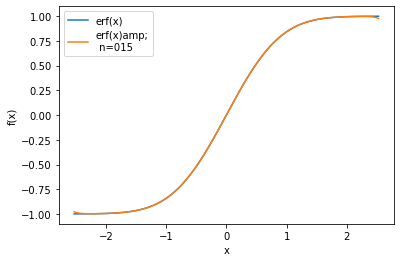

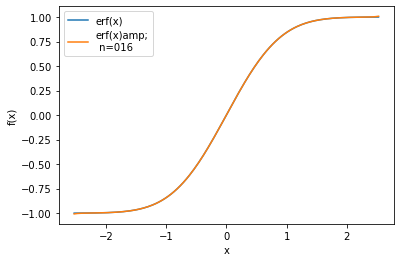

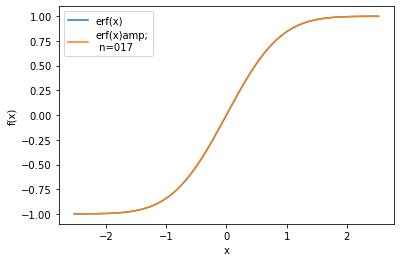

In [846]:

def ampf(x,n):
    amp=0
    for i in range(0,n+1):
        amp+=(((-1)**i)*(x**(2*i+1)))/((2*i+1)*math.factorial(i))
    return 2/(np.pi)**0.5*amp
        
aamp=[0]*len(ab)
n=17
for k in range(0,n+1):
    for i in range(0,len(ab)):
        aamp[i]=ampf(ab[i],k)
        
    plt.plot(ab,afp,'-',label="erf(x)")
    plt.plot(ab,aamp,'-',label="erf(x)amp;\n n=%.3d"%(k))
    
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()

# 2. (Integration) Trigonometric Function

sin, cos함수를 trapezoidal 방법을 이용하여 직접 적분하고 그래프를 그려라.



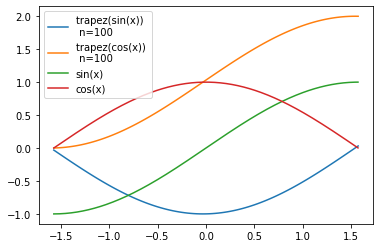

In [847]:
def trapez(f,a,b,n):
    
    
    s=0
    x=a
    dx = (b-a)/n
    while(x<b+dx):
        s+=dx*(0.5*f(x)+0.5*f(x+dx))
        x1.append(x)
        fp.append(s)
        x+=dx

    return s



n=100
a=-0.5*np.pi
b=0.5*np.pi

xdata=np.arange(a,b,0.01)

x1=[]
fp=[]

trapez(np.sin,a,b,n)

plt.plot(x1,fp,'-',label="trapez(sin(x)) \n n=%.3d"%(n))

x1=[]
fp=[]

trapez(np.cos,a,b,n)

plt.plot(x1,fp,'-',label="trapez(cos(x)) \n n=%.3d"%(n))
plt.plot(xdata,np.sin(xdata),'-',label="sin(x)")
plt.plot(xdata,np.cos(xdata),'-',label="cos(x)")
plt.legend()



sin, cos함수를 scipy.integrate 함수를 이용하여 적분하고 그래프를 그려라.

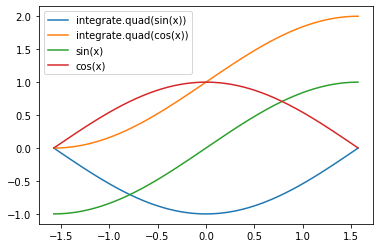

In [848]:
def integratef(f,a,b,n):
    
    
    s=0
    x=a
    dx = (b-a)/n
    while(x<b+dx):
        s=integrate.quad(f,a,x)[0]
        x1.append(x)
        fp.append(s)
        x+=dx

    return s

n=100
a=-0.5*np.pi
b=0.5*np.pi
xdata=np.arange(a,b,0.01)

x1=[]
fp=[]
integratef(np.sin,a,b,n)

plt.plot(x1,fp,'-',label="integrate.quad(sin(x))")

x1=[]
fp=[]
integratef(np.cos,a,b,n)

plt.plot(x1,fp,'-',label="integrate.quad(cos(x))")

plt.plot(xdata,np.sin(xdata),'-',label="sin(x)")
plt.plot(xdata,np.cos(xdata),'-',label="cos(x)")
plt.legend()

구체적으로 $\int_0^x sin(t) dt$, $\int_0^x cos(t) dt$를 x에 대해서 그려라.

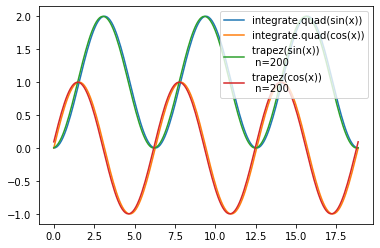

In [849]:
def integratef(f,a,b,n):
    
    
    s=0
    x=a
    dx = (b-a)/n
    while(x<b+dx):
        s=integrate.quad(f,a,x)[0]
        x1.append(x)
        fp.append(s)
        x+=dx

    return s

n=200
a=0
b=6*np.pi
xdata=np.arange(a,b,0.01)

x1=[]
fp=[]
integratef(np.sin,a,b,n)

plt.plot(x1,fp,'-',label="integrate.quad(sin(x))")

x1=[]
fp=[]
integratef(np.cos,a,b,n)

plt.plot(x1,fp,'-',label="integrate.quad(cos(x))")

x1=[]
fp=[]

trapez(np.sin,a,b,n)

plt.plot(x1,fp,'-',label="trapez(sin(x)) \n n=%.3d"%(n))

x1=[]
fp=[]

trapez(np.cos,a,b,n)

plt.plot(x1,fp,'-',label="trapez(cos(x)) \n n=%.3d"%(n))

plt.legend()



# 3. (Differentiation) Trigonometric Function
sin, cos함수의 도함수를 finite difference 방법을 이용하여 구현하고 그래프를 그려라.

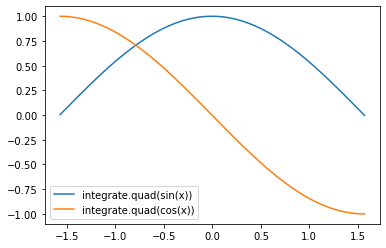

In [850]:
def finite(f,x,dx):
    return(f(x+dx)-f(x))/dx

n=100
a=-0.5*np.pi
b=0.5*np.pi
dx=0.01
xdata=np.arange(a,b,0.01)

plt.plot(xdata,finite(np.sin,xdata,dx),'-',label="integrate.quad(sin(x))")
plt.plot(xdata,finite(np.cos,xdata,dx),'-',label="integrate.quad(cos(x))")


plt.legend()


sin, cos함수의 도함수를 scipy.misc.derivative 함수를 이용하여 구하고 그래프를 그려라.

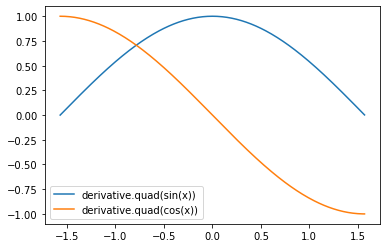

In [851]:
from scipy.misc import derivative


n=100
a=-0.5*np.pi
b=0.5*np.pi
dx=0.01
xdata=np.arange(a,b,0.01)

plt.plot(xdata,derivative(np.sin,xdata,dx),'-',label="derivative.quad(sin(x))")
plt.plot(xdata,derivative(np.cos,xdata,dx),'-',label="derivative.quad(cos(x))")

plt.legend()